In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm

import pickle
from scipy import stats



/home/kamilla/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/kamilla/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/kamilla/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kamilla/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/kamilla/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


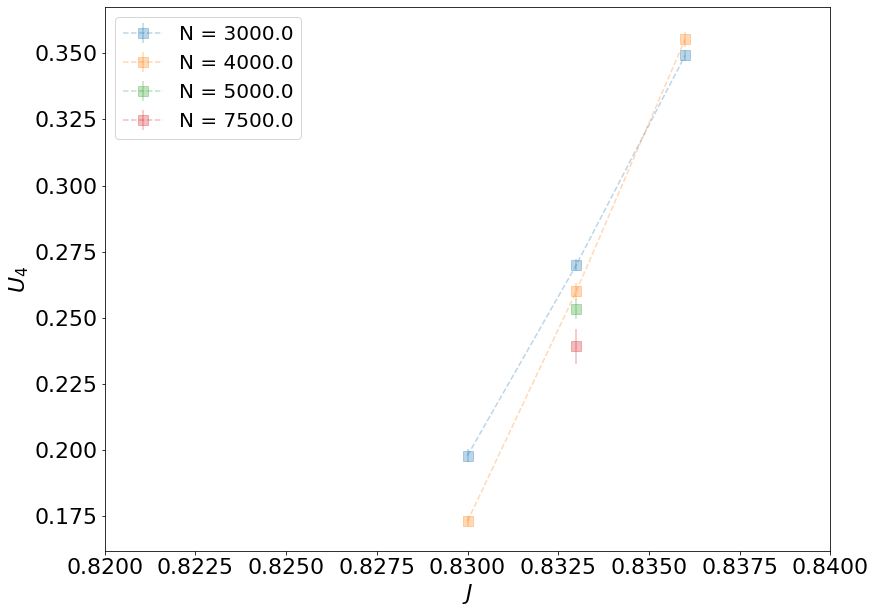

In [2]:
data_np = np.loadtxt("Ising/100Sims/longnear.txt", skiprows=1)

lengths = np.unique(data_np[:, 0])
Js = np.unique(data_np[:, 1])

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    if l==10000:
        continue
    J_l = []
    bc = []
    errs = []
    for J in Js:
        
        data_l = data_np[data_np[:,0]==l]
        data_l = data_l[data_l[:,1]==J]
        
        #data_l = data_l[data_l[:,4]<10000]
        
        meanm4 = np.mean(data_l[:,17])
        meanm2 = np.mean(data_l[:,15])
        
        err4 = np.std(data_l[:,17]/np.sqrt(len(data_l[:,17]))) #np.mean(data_l[:,18])
        err2 = np.std(data_l[:,15]/np.sqrt(len(data_l[:,15])))#np.mean(data_l[:,16])
        
        
        bc_all = 1 - meanm4/3/meanm2/meanm2
        
        err = (2*err2 / meanm2)**2 + (err4 /meanm4)
        err = np.sqrt(err)*bc_all
     
    
    
        bc_all = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]
        
        #bc_all = np.abs(bc_all)
        #bc_all = bc_all[bc_all>0]
        
        
        J_l.append(J)
        bc.append(np.mean(bc_all))
        #bc.append(bc_all)
        #bc.append(stats.trim_mean(bc_all, 0.2))
        #errs.append(err)
        errs.append(np.std(bc_all)/np.sqrt(len(bc_all))  )
        
 

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l), alpha = 0.3)
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(0.2, 0.4)
plt.xlim(0.82, 0.84)
#plt.grid()

plt.legend(loc="best", fontsize=20)
 
 
#plt.savefig("/home/kamilla/Lattice_models/img/mag2.png")

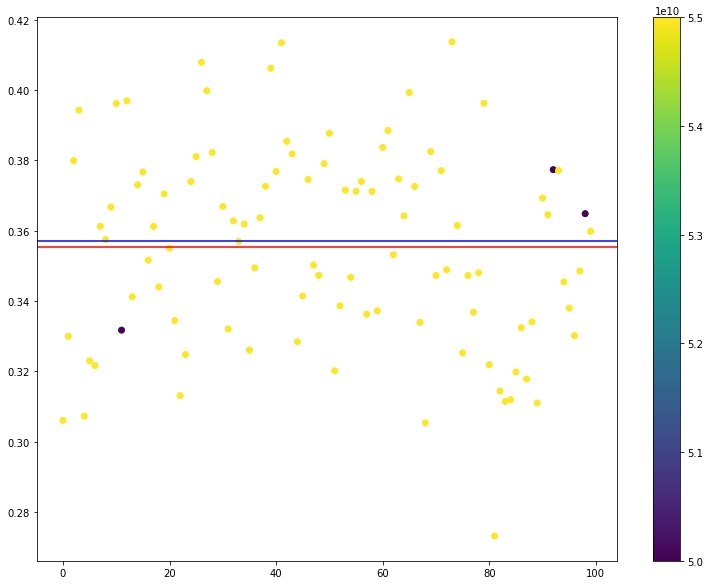

In [3]:

data_np = np.loadtxt("Ising/100Sims/longnear.txt", skiprows=1)
      
data_l = data_np[data_np[:,0]==4000]
data_l = data_l[data_l[:,1]==0.836]

bc_all = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

plt.scatter(np.arange(len(bc_all)), bc_all, c = data_l[:,-1])

plt.axhline(y=np.mean(bc_all), color='r', linestyle='-')
plt.axhline(y=np.median(bc_all), color='b', linestyle='-')
plt.colorbar()



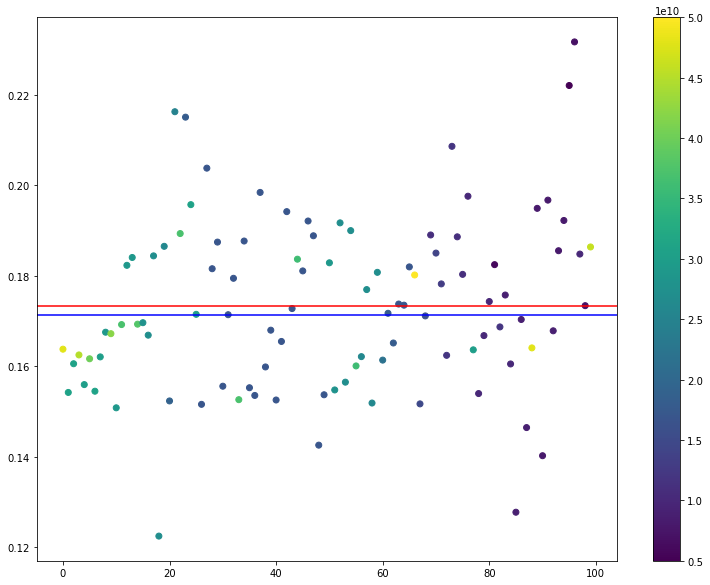

In [4]:

data_np = np.loadtxt("Ising/100Sims/longnear.txt", skiprows=1)

data_l = data_np[data_np[:,0]==4000]
data_l = data_l[data_l[:,1]==0.83]

bc_all = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

plt.scatter(np.arange(len(bc_all)), bc_all, c = data_l[:,-1])

plt.axhline(y=np.mean(bc_all), color='r', linestyle='-')
plt.axhline(y=np.median(bc_all), color='b', linestyle='-')
plt.colorbar()


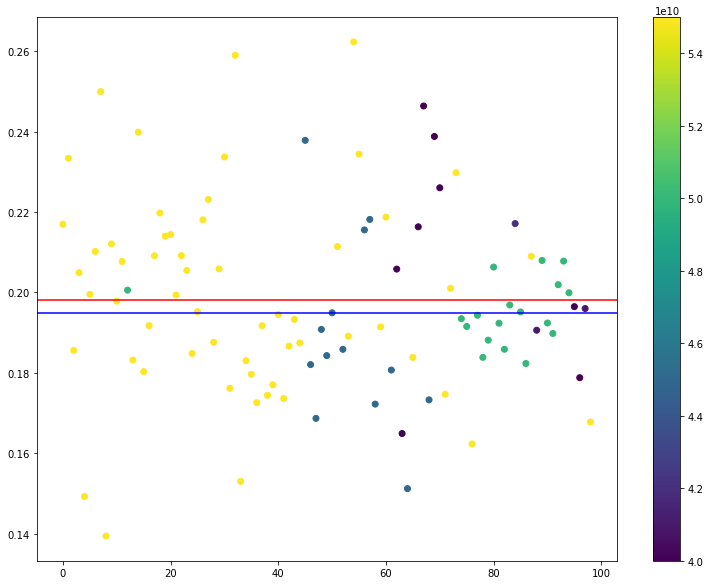

In [5]:

data_np = np.loadtxt("Ising/100Sims/longnear.txt", skiprows=1)

 
        
data_l = data_np[data_np[:,0]==3000]
data_l = data_l[data_l[:,1]==0.83]

bc_all = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

plt.scatter(np.arange(len(bc_all)), bc_all, c = data_l[:,-1])

plt.axhline(y=np.mean(bc_all), color='r', linestyle='-')
plt.axhline(y=np.median(bc_all), color='b', linestyle='-')
plt.colorbar()



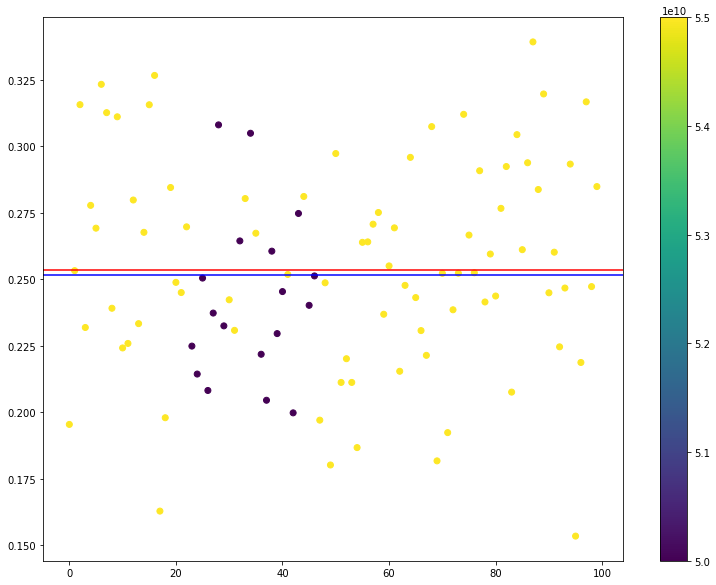

In [6]:

data_np = np.loadtxt("Ising/100Sims/longnear.txt", skiprows=1)

      
data_l = data_np[data_np[:,0]==5000]
data_l = data_l[data_l[:,1]==0.833]

bc_all = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

plt.scatter(np.arange(len(bc_all)), bc_all, c = data_l[:,-1])

plt.axhline(y=np.mean(bc_all), color='r', linestyle='-')
plt.axhline(y=np.median(bc_all), color='b', linestyle='-')
plt.colorbar()



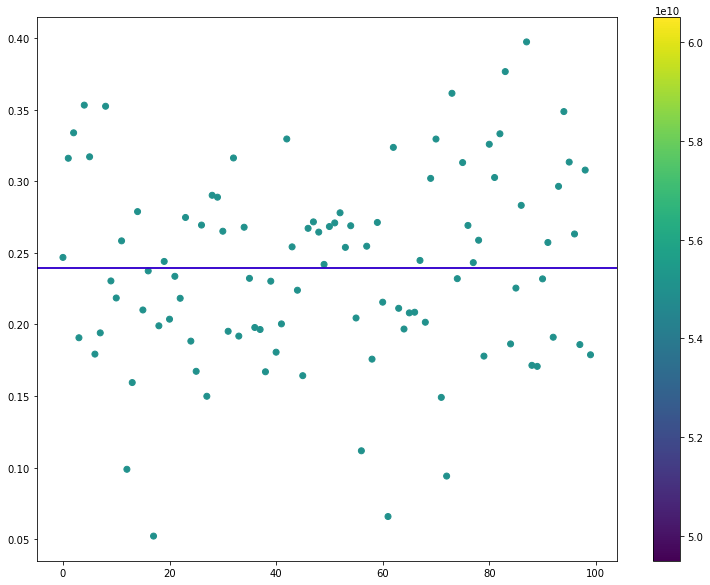

In [7]:

data_np = np.loadtxt("Ising/100Sims/longnear.txt", skiprows=1)

        
data_l = data_np[data_np[:,0]==7500]
data_l = data_l[data_l[:,1]==0.833]

bc_all = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

plt.scatter(np.arange(len(bc_all)), bc_all, c = data_l[:,-1])

plt.axhline(y=np.mean(bc_all), color='r', linestyle='-')
plt.axhline(y=np.median(bc_all), color='b', linestyle='-')
plt.colorbar()

(array([ 2.,  3.,  2., 14., 21., 19., 18., 11.,  8.,  2.]),
 array([0.05207785, 0.08661827, 0.12115869, 0.15569911, 0.19023952,
        0.22477994, 0.25932036, 0.29386077, 0.32840119, 0.36294161,
        0.39748203]),
 <BarContainer object of 10 artists>)

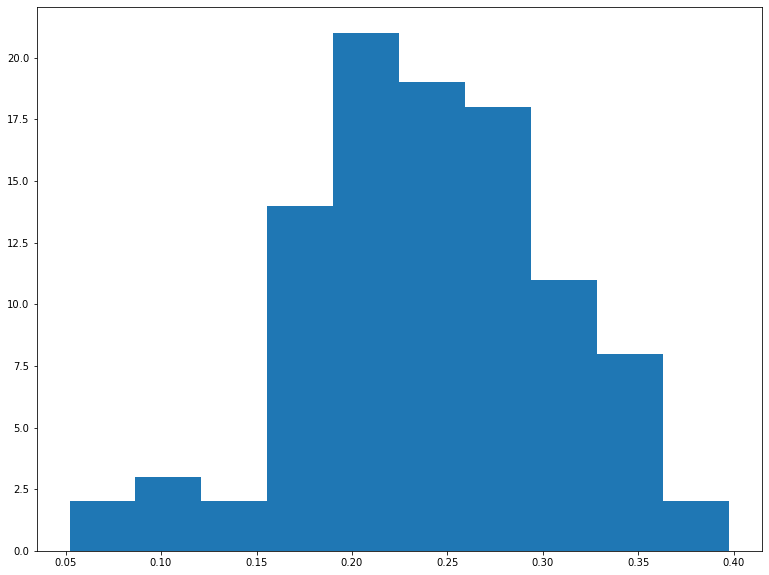

In [8]:
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

plt.hist(bc_all)

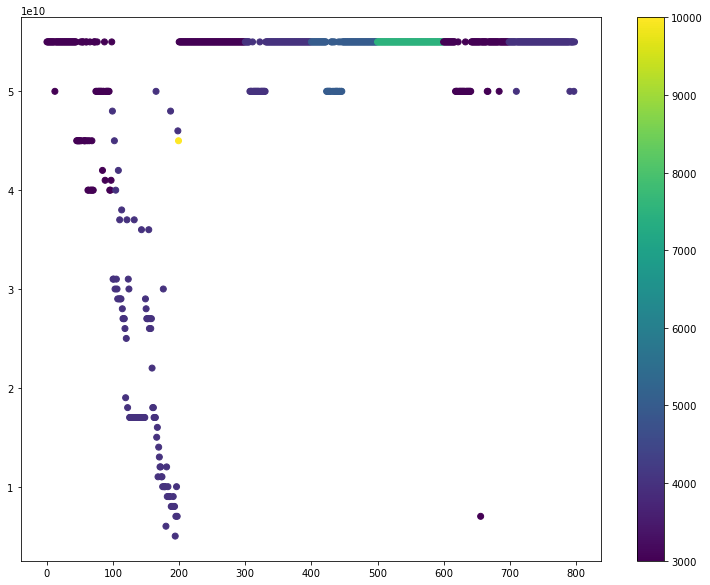

In [9]:
data_np = np.loadtxt("Ising/100Sims/longnear.txt", skiprows=1)
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


plt.scatter(np.arange(len(data_np[:, -1])), data_np[:, -1], c =data_np[:, -0] )

plt.colorbar()



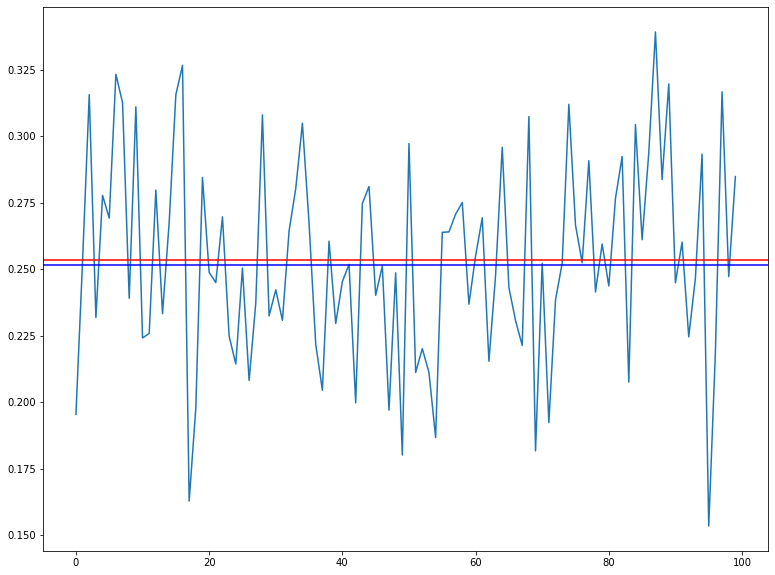

In [75]:
data_np = np.loadtxt("Ising/100Sims/longnear.txt", skiprows=1)

data_l = data_np[data_np[:,0]==5000]

bc_all = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]


fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

plt.plot(bc_all)

plt.axhline(y=np.mean(bc_all), color='r', linestyle='-')
plt.axhline(y=np.median(bc_all), color='b', linestyle='-')


 

(array([ 2.,  3.,  8., 12., 18., 20., 14.,  9., 11.,  3.]),
 array([0.15335566, 0.17194979, 0.19054391, 0.20913804, 0.22773217,
        0.2463263 , 0.26492042, 0.28351455, 0.30210868, 0.32070281,
        0.33929694]),
 <BarContainer object of 10 artists>)

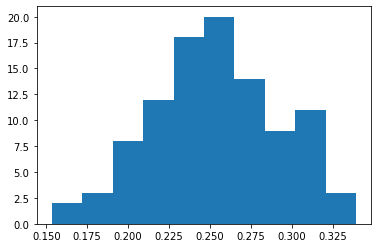

In [76]:
plt.hist(bc_all)

42600.6 43021.71439633853


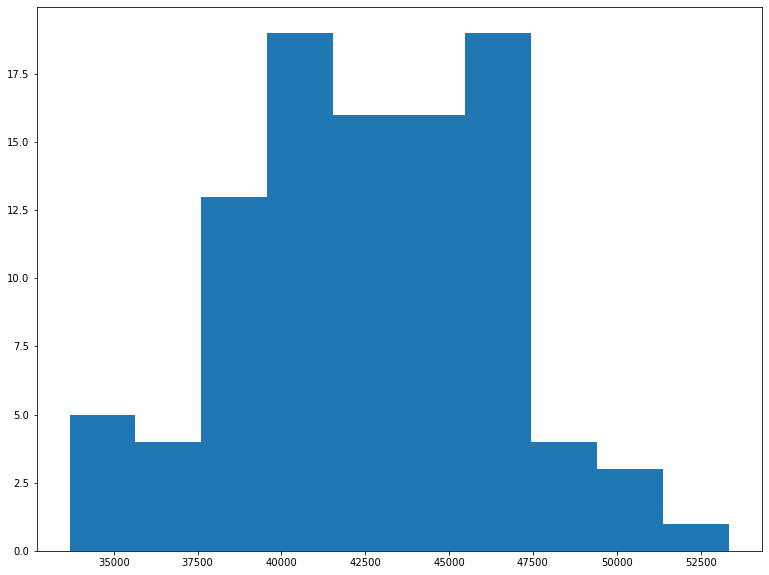

In [77]:
data_np = np.loadtxt("Ising/100Sims/longnear.txt", skiprows=1)

data_l = data_np[data_np[:,0]==7500]

#data_l = data_l[data_l[:,4]<10000]

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

plt.hist(data_l[:, 3])

rad = data_l[:, 3]
err = data_l[:, 4]

mean_r = np.mean(rad)
mean_rw=np.average(rad, weights= err)

print(mean_r, mean_rw)

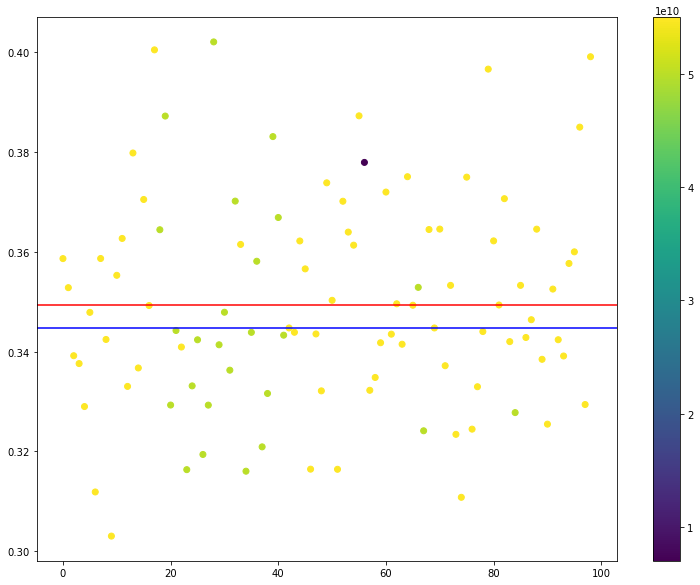

In [10]:

data_np = np.loadtxt("Ising/100Sims/longnear.txt", skiprows=1)

 
        
data_l = data_np[data_np[:,0]==3000]
data_l = data_l[data_l[:,1]==0.836]

bc_all = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

plt.scatter(np.arange(len(bc_all)), bc_all, c = data_l[:,-1])

plt.axhline(y=np.mean(bc_all), color='r', linestyle='-')
plt.axhline(y=np.median(bc_all), color='b', linestyle='-')
plt.colorbar()



(array([ 3.,  6., 12., 19., 19., 15., 12.,  5.,  4.,  4.]),
 array([0.30305996, 0.31295083, 0.32284169, 0.33273255, 0.34262341,
        0.35251427, 0.36240513, 0.37229599, 0.38218685, 0.39207772,
        0.40196858]),
 <BarContainer object of 10 artists>)

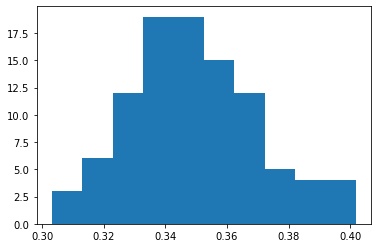

In [11]:
plt.hist(bc_all)

15721.993288590604 15821.826916656113


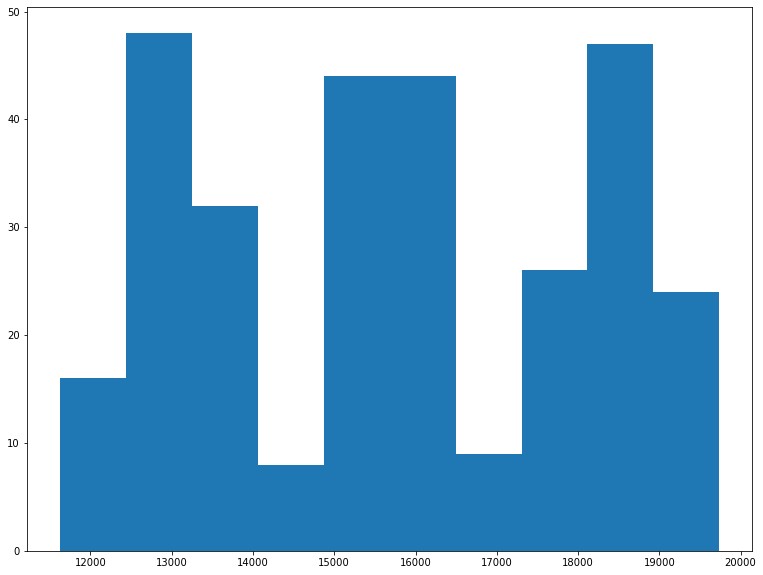

In [13]:
data_np = np.loadtxt("Ising/100Sims/longnear.txt", skiprows=1)

data_l = data_np[data_np[:,0]==3000]

#data_l = data_l[data_l[:,4]<10000]

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

plt.hist(data_l[:, 3])

rad = data_l[:, 3]
err = data_l[:, 4]

mean_r = np.mean(rad)
mean_rw=np.average(rad, weights= err)

print(mean_r, mean_rw)